# Tutorial 1: Build a Semi-distributed Hydrological Model
To get familiar with the HydroCNHS model construction process, let’s start with a hydrological model without human components. 

We adopted the following delineated watershed as a demonstration (Figure 1), in which we want to build a semi-distributed hydrological model to simulate the streamflow at the basin outlet, WSLO. The corresponding subbasins’ information is provided in Table 1.

<img src="./NB_Figs/example_watershed.png" alt="Example watershed." width="400"/>

*Figure 1. Example watershed*

*Table 1. Subbasins’ information*
| Subbasin/outlet | Drainage area [ha] | Latitude [deg] | Flow length to WSLO [m] |
|-----------------|-------------------:|---------------:|------------------------:|
| Hagg            | 10034.2408         | 45.469         | 101469.139              |
| DLLO            | 22568.2404         | 45.475         | 91813.075               |
| TRGC            | 24044.6363         | 45.502         | 80064.864               |
| DAIRY           | 59822.7546         | 45.520         | 70988.164               |
| RCTV            | 19682.6046         | 45.502         | 60398.680               |
| WSLO            | 47646.8477         | 45.350         | 0                       |



In [1]:
import os
import pandas as pd
import hydrocnhs

## Run a simulation

First, let's set up the working directory to run this tutorial.

In [2]:
# Set the working directory
wd = os.path.abspath(
    os.path.join(
        os.path.dirname(hydrocnhs.__file__),
        '..', 'tutorials',
        'Tutorial_1-Build_a_Semi-distributed_Hydrological_Model'
        )
    )

print(wd)

C:\Users\CL\Documents\GitHub\HydroCNHS\tutorials\Tutorial_1-Build_a_Semi-distributed_Hydrological_Model


Then, we load the climate inputs, including temperature, precipitation, and potential evapotranspiration, from `.csv` and convert them into `dictionaries`.

In [3]:
# Load climate inputs
data_path = os.path.join(wd, "Data")

temp = pd.read_csv(
    os.path.join(data_path, "Temp_degC.csv"), index_col=["Date"]
).to_dict(orient="list")

prec = pd.read_csv(os.path.join(data_path, "Prec_cm.csv"), index_col=["Date"]).to_dict(
    orient="list"
)

pet = pd.read_csv(os.path.join(data_path, "Pet_cm.csv"), index_col=["Date"]).to_dict(
    orient="list"
)

Next, we load a calibrated model to give a taste of how a simulation looks like before jumping into details about how to construct and calibrated model.

The `Model` in HydroCNHS is defined in a single `.yaml` file. The file will be loaded into Python and displayed as a `dictionary`. We highly recommend that you open `Best_HydroModel_gwlf_KGE.yaml`, located in `Tutorial_1-Build_a_Semi-distributed_Hydrological_Model/Cali_HydroModel_gwlf_KGE/Cali_HydroModel_gwlf_KGE`, to get a quick look at how a model is constructed.


In [4]:
# Add model path
model_path = os.path.join(
    wd, "Cali_HydroModel_gwlf_KGE", "Best_HydroModel_gwlf_KGE.yaml"
    )
print(model_path)

# Load the model
model_dict = hydrocnhs.load_model(model_path)
# Here we manually change the working directory in the model directory
model_dict["Path"]["WD"] = wd

C:\Users\CL\Documents\GitHub\HydroCNHS\tutorials\Tutorial_1-Build_a_Semi-distributed_Hydrological_Model\Cali_HydroModel_gwlf_KGE\Best_HydroModel_gwlf_KGE.yaml
[09/07 12:03:50] HydroCNHS.sc [INFO] Parsed model data summary:
SimSeq
  ['WSLO']
RoutingOutlets
  ['WSLO']
DamAgents
  None
ConveyingAgents
  None
RiverDivAgents
  None
InsituAgents
  None
AgSimSeq
  None


After `Best_HydroModel_gwlf_KGE.yaml` is loaded, a summary printout shows a single routing outlet, 'WSLO,' with no other agents listed.

Now, we can apply `model_dict` to create a model object for the simulation.

In [5]:
# Create the model object
model = hydrocnhs.Model(model_dict)

[09/07 12:03:50] HydroCNHS.sc [INFO] Parsed model data summary:
SimSeq
  ['WSLO']
RoutingOutlets
  ['WSLO']
DamAgents
  None
ConveyingAgents
  None
RiverDivAgents
  None
InsituAgents
  None
AgSimSeq
  None
[09/07 12:03:50] HydroCNHS.dc [INFO] Add field Q_runoff (<class 'dict'>).
[09/07 12:03:50] HydroCNHS.dc [INFO] Add field Q_routed (<class 'dict'>).
[09/07 12:03:50] HydroCNHS.dc [INFO] Add field prec (<class 'dict'>).
[09/07 12:03:50] HydroCNHS.dc [INFO] Add field temp (<class 'dict'>).
[09/07 12:03:50] HydroCNHS.dc [INFO] Add field pet (<class 'dict'>).
[09/07 12:03:50] HydroCNHS.dc [INFO] Add field UH_Lohmann (<class 'dict'>).
[09/07 12:03:50] HydroCNHS.dc [INFO] Add field UH_Lohmann_convey (<class 'dict'>).


With that, we can start the simulation by calling `run` method with climate inputs as arguments.

In [6]:
# Run a simulation.
Q = model.run(temp, prec, pet)

# Ture the output to a pandas DataFrame. Here, we resample the daily output to monthly.
results = pd.DataFrame(Q, index=model.pd_date_index).resample("MS").mean()
print(results.head())

[09/07 12:03:50] HydroCNHS [INFO] Load temp & prec & pet with total length 12053.
[09/07 12:03:50] HydroCNHS [INFO] Set rainfall-runoff to GWLF.
[09/07 12:03:51] HydroCNHS [INFO] Complete rainfall-runoff simulation setup. [00:00:00]
[09/07 12:03:51] HydroCNHS [INFO] Start forming 6 UHs for Lohmann routing. [00:00:00]
[09/07 12:03:53] HydroCNHS [INFO] Complete forming UHs for Lohmann routing. [00:00:02]
[09/07 12:03:53] HydroCNHS [INFO] Start a pure hydrological simulation (no human component).
[09/07 12:03:55] HydroCNHS [INFO] 
Compute rainfall-runoffs for 12053 time steps.


12053it [00:00, 39096.06it/s]


[09/07 12:03:55] HydroCNHS [INFO] Complete HydroCNHS simulation! [00:00:04]

                Hagg      DLLO       TRGC      DAIRY      RCTV       WSLO
1981-01-01  2.526067  4.067260  12.838741  26.357862  5.005605  51.985477
1981-02-01  4.960201  4.975534  15.321548  34.900794  8.212731  73.016122
1981-03-01  1.547300  1.163473   2.473601   9.360561  1.253275  44.330615
1981-04-01  1.720808  1.688222   4.057178  11.438015  1.174595  29.586883
1981-05-01  0.335844  0.000063   0.000188   0.194160  0.000208   0.397095


Below, we compare the simulated discharge at WSLO (routing outlet) with the observation.

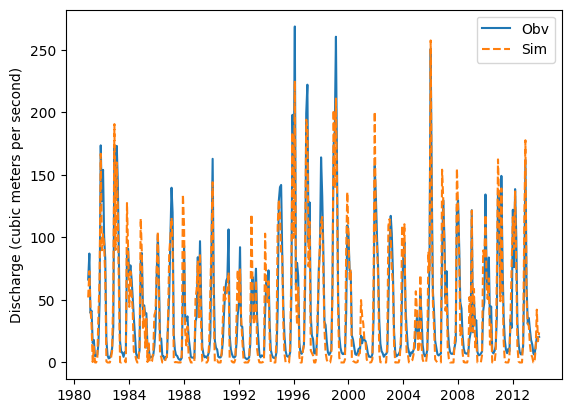

In [7]:
import matplotlib.pyplot as plt

# Load the observed flow data
obv_flow_WSLO = pd.read_csv(
    os.path.join(wd, "Data", "WSLO_M_cms.csv"), index_col=["Date"], parse_dates=["Date"]
)

# Plot
fig, ax = plt.subplots()
ax.plot(obv_flow_WSLO.index, obv_flow_WSLO.loc[:, "WSLO"], label="Obv")
ax.plot(obv_flow_WSLO.index, results["WSLO"], ls="--", label="Sim")
ax.set_ylabel("Discharge (cubic meters per second)")
ax.legend()

## Construct a model

Now, we have experience how to run a simulation using `HydroCNHS`. Next, we want to dive a little bit further to construct a model ourselves. 

To that, HydroCNHS includes a model builder designed to assist users in creating a draft `model.yaml` file.

First, initialize a model builder object with a working directory. The instructions will then pop out to help you create a model file. You can recall the instructions by calling `mb.help()`.

In [8]:
# We reuse the working directory used above.
mb = hydrocnhs.ModelBuilder(wd)

Follow the following steps to create model & ABM script templates:
	Step 1: set_water_system()
	Step 2: set_rainfall_runoff()
	Step 3: set_routing_outlet(), one at a time.
	Step 4: (optional) set_sediment().
	Step 5: (optional) add_sediment(), one at a time.
	Step 6: (optional) set_ABM().
	Step 7: (optional) add_agent().
	Step 8: (optional) add_institution().
	Step 9: write_model_to_yaml()
	Step 10: (optional) gen_ABM_script_template()
Open the generated draft 'model.yaml' (& ABM module template) and further edit them.
Use .help to re-print the above instructions.


Following the instructions, we first configure a water system by setting the simulation period, which includes the start and end dates.

In [9]:
mb.set_water_system(start_date="1981/1/1", end_date="2013/12/31")

Then, we can add subbasins (i.e., `outlet_list`) to the model. We adopt the GWLF model as the rainfall-runoff model (i.e., `runoff_model`). We also assign the corresponding subbasins' areas (i.e., `area_list`) and latitudes (i.e., `lat_list`) using the information from Table 4. Note that `area_list` and `lat_list` are optional arguments. Users can manually enter this information into the `model.yaml` file.


In [10]:
# outlet list includes all the outlets in the model, routing outlets and non-routing outlets.
outlet_list = ['Hagg', 'DLLO', 'TRGC', 'DAIRY', 'RCTV', 'WSLO']
area_list = [10034.2408, 22568.2404, 24044.6363, 59822.7546, 19682.6046, 47646.8477]
lat_list = [45.469, 45.475, 45.502, 45.520, 45.502, 45.350]
mb.set_rainfall_runoff(
    outlet_list=outlet_list,area_list=area_list,
    lat_list=lat_list, runoff_model="GWLF"
    )

Next, we specify the routing outlet setting. Here, we only have one routing outlet, WSLO, hence, we only need to run the following code once, and all the outlets are considered upstream outlets of WSLO.

In [11]:
flow_length_list = [101469.139, 91813.075, 80064.864, 70988.164, 60398.680, 0] # km
mb.set_routing_outlet(
    routing_outlet="WSLO",
    upstream_outlet_list=outlet_list,
    flow_length_list=flow_length_list
    )

Since we don't have any agents in this tutorial, we have done all the setup. We can print out the model for quick view and then write it to `model.yaml` file.

In [12]:
# Print the model in the console
mb.print_model()

# Output draft model configuration file (model.yaml)
mb.write_model_to_yaml(filename="model.yaml")

Path
  WD
    C:\Users\CL\Documents\GitHub\HydroCNHS\tutorials\Tutorial_1-Build_a_Semi-distributed_Hydrological_Model
  Modules
    
WaterSystem
  StartDate
    1981/1/1
  EndDate
    2013/12/31
  DataLength
    12053
  NumSubbasins
    6
  Outlets
    ['Hagg', 'DLLO', 'TRGC', 'DAIRY', 'RCTV', 'WSLO']
  NodeGroups
    []
  RainfallRunoff
    GWLF
  Routing
    Lohmann
  ABM
    None
RainfallRunoff
  Hagg
    Inputs
      {'Area': 10034.2408, 'Latitude': 45.469, 'S0': 2, 'U0': 10, 'SnowS': 5}
    Pars
      {'CN2': -99, 'IS': -99, 'Res': -99, 'Sep': -99, 'Alpha': -99, 'Beta': -99, 'Ur': -99, 'Df': -99, 'Kc': -99}
  DLLO
    Inputs
      {'Area': 22568.2404, 'Latitude': 45.475, 'S0': 2, 'U0': 10, 'SnowS': 5}
    Pars
      {'CN2': -99, 'IS': -99, 'Res': -99, 'Sep': -99, 'Alpha': -99, 'Beta': -99, 'Ur': -99, 'Df': -99, 'Kc': -99}
  TRGC
    Inputs
      {'Area': 24044.6363, 'Latitude': 45.502, 'S0': 2, 'U0': 10, 'SnowS': 5}
    Pars
      {'CN2': -99, 'IS': -99, 'Res': -99, 'Sep': -99, 'A

## Model calibraion

Before applying the draft `model.yaml` for calibration, we need to ensure the information is correct. 

The "Inputs" in the `LSM` and `Routing` sections should all be populated. Some default values may be used (e.g., `S0`, `U0`, and `SnowS`). They should be updated according to the user's needs. For this tutorial, no modifications are needed. You might notice that all the parameters have a value of `-99`. This is the default value in HydroCNHS, indicating that those values are subject to calibration if not provided by the user.

Below, we provide a sample calibration code using genetic algorithm (GA) and Kling-Gupta efficiency (KGE) at WSLO as the objective. The calibration will take around 2 to 3 hours depending on your hardware.

Note: By running the following code, the entire `Cali_HydroModel_gwlf_KGE` folder will be overwritten. 

In [15]:
import pandas as pd
import hydrocnhs.calibration as cali
from copy import deepcopy

# Load climate inputs
temp = pd.read_csv(
    os.path.join(wd, "Data", "Temp_degC.csv"), index_col=["Date"]
).to_dict(orient="list")
prec = pd.read_csv(os.path.join(wd, "Data", "Prec_cm.csv"), index_col=["Date"]).to_dict(
    orient="list"
)
pet = pd.read_csv(os.path.join(wd, "Data", "Pet_cm.csv"), index_col=["Date"]).to_dict(
    orient="list"
)

# Load flow gauge monthly data at WSLO
obv_flow_WSLO = pd.read_csv(
    os.path.join(wd, "Data", "WSLO_M_cms.csv"), index_col=["Date"], parse_dates=["Date"]
)

# Load model (the model can be loaded by giving the path of the model configuration file)
model_dict = hydrocnhs.load_model(os.path.join(wd, "model.yaml"))

# Generate default parameter bounds
df_list, df_name = hydrocnhs.write_model_to_df(model_dict)
par_bound_df_list, df_name = hydrocnhs.gen_default_bounds(model_dict)

# Create convertor for calibration. Check the manual for converter details.
converter = cali.Convertor()
cali_inputs = converter.gen_cali_inputs(wd, df_list, par_bound_df_list)
formatter = converter.formatter

# Code evaluation function for GA algorthm
def evaluation(individual, info):
    cali_wd, current_generation, ith_individual, formatter, _ = info
    name = "{}-{}".format(current_generation, ith_individual)

    ##### individual -> model
    # Convert 1D array to a list of dataframes.
    df_list = cali.Convertor.to_df_list(individual, formatter)
    # Feed dataframes in df_list to model dictionary.
    model = deepcopy(model_dict)
    for i, df in enumerate(df_list):
        s = df_name[i].split("_")[0]
        model = hydrocnhs.load_df_to_model_dict(model, df, s, "Pars")

    ##### Run simuluation
    model = hydrocnhs.Model(model, name)
    Q = model.run(temp, prec, pet)

    ##### Get simulation data
    # Streamflow of routing outlets.
    cali_target = ["WSLO"]
    cali_period = ("1981-1-1", "2005-12-31")
    sim_Q_D = pd.DataFrame(Q, index=model.pd_date_index)[cali_target]
    # Resample the daily simulation output to monthly outputs.
    sim_Q_M = sim_Q_D[cali_target].resample("MS").mean()

    KGE = hydrocnhs.Indicator().KGE(
        x_obv=obv_flow_WSLO[cali_period[0] : cali_period[1]][cali_target],
        y_sim=sim_Q_M[cali_period[0] : cali_period[1]][cali_target],
    )

    fitness = KGE
    return (fitness,)


config = {
    "min_or_max": "max",
    "pop_size": 100,
    "num_ellite": 1,
    "prob_cross": 0.5,
    "prob_mut": 0.15,
    "stochastic": False,
    "max_gen": 100,
    "sampling_method": "LHC",
    "drop_record": False,
    "paral_cores": -1,
    "paral_verbose": 1,
    "auto_save": True,
    "print_level": 1,
    "plot": True,
}

seed = 5
rn_gen = hydrocnhs.create_rn_gen(seed)
ga = cali.GA_DEAP(evaluation, rn_gen)
ga.set(cali_inputs, config, formatter, name="Cali_HydroModel_gwlf_KGE")
ga.run()
summary = ga.summary
individual = ga.solution

##### Output the calibrated model.
df_list = cali.Convertor.to_df_list(individual, formatter)
model_best = deepcopy(model_dict)
for i, df in enumerate(df_list):
    s = df_name[i].split("_")[0]
    model = hydrocnhs.load_df_to_model_dict(model_best, df, s, "Pars")
hydrocnhs.write_model(
    model_best, os.path.join(ga.cali_wd, "Best_HydroModel_gwlf_KGE.yaml")
)

[09/07 12:47:25] HydroCNHS.sc [INFO] Parsed model data summary:
SimSeq
  ['WSLO']
RoutingOutlets
  ['WSLO']
DamAgents
  None
ConveyingAgents
  None
RiverDivAgents
  None
InsituAgents
  None
AgSimSeq
  None
GA Calibration Guide
Step 1: set or load (GA_auto_save.pickle).
Step 2: run.
[09/07 12:47:25] HydroCNHS.GA [INFO] User-provided random number generator is assigned.
[09/07 12:47:25] HydroCNHS.GA [WARNING] Current calibration folder exists. Default to overwrite the folder!
C:\Users\CL\Documents\GitHub\HydroCNHS\tutorials\Tutorial_1-Build_a_Semi-distributed_Hydrological_Model\Cali_HydroModel_gwlf_KGE


C:\Users\CL\Documents\GitHub\HydroCNHS\hydrocnhs\util.py:266: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[25, 100]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[k, :] = str(v)
C:\Users\CL\Documents\GitHub\HydroCNHS\hydrocnhs\util.py:266: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[25, 100]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[k, :] = str(v)
C:\Users\CL\Documents\GitHub\HydroCNHS\hydrocnhs\util.py:266: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[25, 100]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[k, :] = str(v)
C:\Users\CL\Documents\GitHub\HydroCNHS\hydrocnhs\util.py:266:


=====Generation 0=====
  Elapsed time 00:00:57
  Min -0.26206
  Max -0.00039
  Avg -0.06191
  Std 0.04882


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   54.7s finished



=====Generation 1=====
  Elapsed time 00:01:52
  Min -0.05012
  Max -3e-05
  Avg -0.00188
  Std 0.00716


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   46.1s finished



=====Generation 2=====
  Elapsed time 00:02:38
  Min -0.01405
  Max -1e-05
  Avg -0.00031
  Std 0.00181


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   48.5s finished



=====Generation 3=====
  Elapsed time 00:03:27
  Min -0.05057
  Max -1e-05
  Avg -0.00092
  Std 0.00529


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   45.6s finished



=====Generation 4=====
  Elapsed time 00:04:13
  Min -0.02953
  Max -1e-05
  Avg -0.00108
  Std 0.0042


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   44.7s finished



=====Generation 5=====
  Elapsed time 00:04:58
  Min -0.05368
  Max -0.0
  Avg -0.00075
  Std 0.00539


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   46.4s finished



=====Generation 6=====
  Elapsed time 00:05:45
  Min -0.034
  Max -0.0
  Avg -0.00158
  Std 0.00607


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   46.5s finished



=====Generation 7=====
  Elapsed time 00:06:32
  Min -0.0283
  Max -0.0
  Avg -0.00062
  Std 0.00301


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   46.5s finished



=====Generation 8=====
  Elapsed time 00:07:19
  Min -0.07037
  Max -0.0
  Avg -0.00142
  Std 0.0077


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   47.2s finished



=====Generation 9=====
  Elapsed time 00:08:07
  Min -0.02315
  Max -0.0
  Avg -0.00054
  Std 0.00258


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   46.1s finished



=====Generation 10=====
  Elapsed time 00:08:53
  Min -0.02634
  Max -0.0
  Avg -0.00028
  Std 0.00262


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   48.2s finished



=====Generation 11=====
  Elapsed time 00:09:42
  Min -0.04389
  Max -0.0
  Avg -0.00308
  Std 0.00859


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   46.8s finished



=====Generation 12=====
  Elapsed time 00:10:29
  Min -0.03428
  Max -0.0
  Avg -0.00204
  Std 0.00626


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   46.7s finished



=====Generation 13=====
  Elapsed time 00:11:16
  Min -0.05836
  Max -0.0
  Avg -0.00269
  Std 0.00914


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   46.1s finished



=====Generation 14=====
  Elapsed time 00:12:03
  Min -0.04239
  Max -0.0
  Avg -0.00177
  Std 0.00647


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   46.0s finished



=====Generation 15=====
  Elapsed time 00:12:49
  Min -0.07286
  Max -0.0
  Avg -0.0024
  Std 0.00925


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   47.8s finished



=====Generation 16=====
  Elapsed time 00:13:38
  Min -0.09547
  Max -0.0
  Avg -0.00338
  Std 0.01224


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   46.8s finished



=====Generation 17=====
  Elapsed time 00:14:25
  Min -0.0471
  Max -0.0
  Avg -0.00127
  Std 0.00619


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   45.7s finished



=====Generation 18=====
  Elapsed time 00:15:11
  Min -0.04669
  Max -0.0
  Avg -0.0011
  Std 0.00554


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   47.8s finished



=====Generation 19=====
  Elapsed time 00:16:00
  Min -0.09814
  Max -0.0
  Avg -0.00193
  Std 0.01053


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   50.1s finished



=====Generation 20=====
  Elapsed time 00:16:50
  Min -0.03513
  Max -0.0
  Avg -0.00086
  Std 0.00461


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   46.7s finished



=====Generation 21=====
  Elapsed time 00:17:38
  Min -0.03894
  Max -0.0
  Avg -0.00127
  Std 0.00564


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   47.1s finished



=====Generation 22=====
  Elapsed time 00:18:25
  Min -0.04324
  Max -0.0
  Avg -0.00105
  Std 0.00505


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   46.6s finished



=====Generation 23=====
  Elapsed time 00:19:13
  Min -0.10362
  Max -0.0
  Avg -0.00426
  Std 0.01551


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   48.8s finished



=====Generation 24=====
  Elapsed time 00:20:02
  Min -0.04593
  Max -0.0
  Avg -0.0017
  Std 0.00644


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   47.3s finished



=====Generation 25=====
  Elapsed time 00:20:50
  Min -0.05412
  Max -0.0
  Avg -0.00148
  Std 0.00723


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   47.2s finished



=====Generation 26=====
  Elapsed time 00:21:38
  Min -0.03413
  Max -0.0
  Avg -0.00086
  Std 0.0039


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   47.0s finished



=====Generation 27=====
  Elapsed time 00:22:26
  Min -0.0324
  Max -0.0
  Avg -0.001
  Std 0.00455


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   50.0s finished



=====Generation 28=====
  Elapsed time 00:23:16
  Min -0.09845
  Max -0.0
  Avg -0.00259
  Std 0.01232


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   49.3s finished



=====Generation 29=====
  Elapsed time 00:24:06
  Min -0.0483
  Max -0.0
  Avg -0.00203
  Std 0.00804


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   48.8s finished



=====Generation 30=====
  Elapsed time 00:24:56
  Min -0.03247
  Max -0.0
  Avg -0.00073
  Std 0.00398


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:  1.2min finished



=====Generation 31=====
  Elapsed time 00:26:09
  Min -0.01883
  Max -0.0
  Avg -0.00071
  Std 0.00268


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   52.1s finished



=====Generation 32=====
  Elapsed time 00:27:03
  Min -0.05818
  Max -0.0
  Avg -0.00103
  Std 0.00599


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   51.0s finished



=====Generation 33=====
  Elapsed time 00:27:55
  Min -0.0853
  Max -0.0
  Avg -0.00324
  Std 0.01103


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   51.2s finished



=====Generation 34=====
  Elapsed time 00:28:47
  Min -0.03786
  Max -0.0
  Avg -0.00189
  Std 0.00691


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   56.3s finished



=====Generation 35=====
  Elapsed time 00:29:45
  Min -0.03915
  Max -0.0
  Avg -0.00091
  Std 0.00456


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   56.6s finished



=====Generation 36=====
  Elapsed time 00:30:42
  Min -0.0551
  Max -0.0
  Avg -0.00111
  Std 0.00604


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:  1.2min finished



=====Generation 37=====
  Elapsed time 00:31:55
  Min -0.02529
  Max -0.0
  Avg -0.00133
  Std 0.00446


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   57.9s finished



=====Generation 38=====
  Elapsed time 00:32:54
  Min -0.06534
  Max -0.0
  Avg -0.00141
  Std 0.00744


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:  1.2min finished



=====Generation 39=====
  Elapsed time 00:34:08
  Min -0.01592
  Max -0.0
  Avg -0.00024
  Std 0.00163


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:  1.2min finished



=====Generation 40=====
  Elapsed time 00:35:21
  Min -0.04931
  Max -0.0
  Avg -0.00179
  Std 0.00732


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   59.0s finished



=====Generation 41=====
  Elapsed time 00:36:22
  Min -0.02446
  Max -0.0
  Avg -0.0006
  Std 0.00286


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   54.5s finished



=====Generation 42=====
  Elapsed time 00:37:17
  Min -0.01253
  Max -0.0
  Avg -0.00049
  Std 0.00184


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   55.3s finished



=====Generation 43=====
  Elapsed time 00:38:14
  Min -0.00611
  Max -0.0
  Avg -0.0001
  Std 0.00064


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   49.5s finished



=====Generation 44=====
  Elapsed time 00:39:05
  Min -0.04183
  Max -0.0
  Avg -0.00113
  Std 0.00532


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   49.4s finished



=====Generation 45=====
  Elapsed time 00:39:56
  Min -0.03145
  Max -0.0
  Avg -0.00083
  Std 0.00412


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   49.8s finished



=====Generation 46=====
  Elapsed time 00:40:47
  Min -0.01504
  Max -0.0
  Avg -0.00047
  Std 0.00191


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   50.9s finished



=====Generation 47=====
  Elapsed time 00:41:39
  Min -0.03314
  Max -0.0
  Avg -0.0017
  Std 0.00576


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   49.7s finished



=====Generation 48=====
  Elapsed time 00:42:30
  Min -0.03556
  Max -0.0
  Avg -0.00079
  Std 0.00426


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   49.0s finished



=====Generation 49=====
  Elapsed time 00:43:20
  Min -0.01866
  Max -0.0
  Avg -0.00034
  Std 0.00208


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   51.4s finished



=====Generation 50=====
  Elapsed time 00:44:12
  Min -0.09575
  Max -0.0
  Avg -0.00163
  Std 0.01123


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   49.5s finished



=====Generation 51=====
  Elapsed time 00:45:04
  Min -0.08642
  Max -0.0
  Avg -0.00251
  Std 0.01048


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   51.0s finished



=====Generation 52=====
  Elapsed time 00:45:56
  Min -0.02917
  Max -0.0
  Avg -0.00067
  Std 0.00344


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   54.7s finished



=====Generation 53=====
  Elapsed time 00:46:52
  Min -0.00486
  Max -0.0
  Avg -0.00012
  Std 0.0006


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   49.6s finished



=====Generation 54=====
  Elapsed time 00:47:43
  Min -0.02795
  Max -0.0
  Avg -0.00098
  Std 0.0038


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   48.7s finished



=====Generation 55=====
  Elapsed time 00:48:33
  Min -0.03329
  Max -0.0
  Avg -0.00122
  Std 0.00518


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   48.2s finished



=====Generation 56=====
  Elapsed time 00:49:23
  Min -0.05672
  Max -0.0
  Avg -0.00157
  Std 0.00766


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   51.2s finished



=====Generation 57=====
  Elapsed time 00:50:15
  Min -0.02202
  Max -0.0
  Avg -0.00061
  Std 0.00264


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   51.5s finished



=====Generation 58=====
  Elapsed time 00:51:08
  Min -0.04439
  Max -0.0
  Avg -0.00237
  Std 0.00801


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   48.0s finished



=====Generation 59=====
  Elapsed time 00:51:58
  Min -0.08251
  Max -0.0
  Avg -0.00392
  Std 0.01326


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   49.5s finished



=====Generation 60=====
  Elapsed time 00:52:49
  Min -0.02028
  Max -0.0
  Avg -0.00086
  Std 0.00344


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   50.7s finished



=====Generation 61=====
  Elapsed time 00:53:41
  Min -0.02956
  Max -0.0
  Avg -0.0009
  Std 0.00409


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   51.1s finished



=====Generation 62=====
  Elapsed time 00:54:34
  Min -0.06219
  Max -0.0
  Avg -0.00119
  Std 0.00672


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   48.2s finished



=====Generation 63=====
  Elapsed time 00:55:23
  Min -0.0702
  Max -0.0
  Avg -0.00239
  Std 0.00948


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   49.6s finished



=====Generation 64=====
  Elapsed time 00:56:14
  Min -0.02519
  Max -0.0
  Avg -0.0012
  Std 0.00429


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   51.0s finished



=====Generation 65=====
  Elapsed time 00:57:07
  Min -0.03289
  Max -0.0
  Avg -0.00113
  Std 0.00455


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   48.1s finished



=====Generation 66=====
  Elapsed time 00:57:56
  Min -0.01661
  Max -0.0
  Avg -0.00044
  Std 0.00213


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   47.7s finished



=====Generation 67=====
  Elapsed time 00:58:46
  Min -0.03105
  Max -0.0
  Avg -0.00087
  Std 0.00383


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   48.3s finished



=====Generation 68=====
  Elapsed time 00:59:36
  Min -0.02234
  Max -0.0
  Avg -0.00048
  Std 0.00267


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   51.6s finished



=====Generation 69=====
  Elapsed time 01:00:29
  Min -0.01154
  Max -0.0
  Avg -0.00027
  Std 0.00149


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   51.2s finished



=====Generation 70=====
  Elapsed time 01:01:22
  Min -0.03319
  Max -0.0
  Avg -0.00141
  Std 0.00541


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   49.2s finished



=====Generation 71=====
  Elapsed time 01:02:13
  Min -0.06306
  Max -0.0
  Avg -0.00185
  Std 0.00932


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   48.2s finished



=====Generation 72=====
  Elapsed time 01:03:03
  Min -0.03659
  Max -0.0
  Avg -0.00142
  Std 0.00595


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   49.9s finished



=====Generation 73=====
  Elapsed time 01:03:55
  Min -0.03119
  Max -0.0
  Avg -0.00162
  Std 0.00529


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   51.5s finished



=====Generation 74=====
  Elapsed time 01:04:48
  Min -0.03333
  Max -0.0
  Avg -0.00062
  Std 0.00366


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   48.5s finished



=====Generation 75=====
  Elapsed time 01:05:38
  Min -0.04915
  Max -0.0
  Avg -0.00176
  Std 0.00652


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   48.8s finished



=====Generation 76=====
  Elapsed time 01:06:29
  Min -0.02737
  Max -0.0
  Avg -0.00129
  Std 0.00471


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   51.5s finished



=====Generation 77=====
  Elapsed time 01:07:22
  Min -0.02293
  Max -0.0
  Avg -0.0009
  Std 0.00347


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   49.7s finished



=====Generation 78=====
  Elapsed time 01:08:13
  Min -0.03026
  Max -0.0
  Avg -0.00114
  Std 0.00508


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   48.3s finished



=====Generation 79=====
  Elapsed time 01:09:03
  Min -0.02918
  Max -0.0
  Avg -0.00091
  Std 0.00406


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   49.0s finished



=====Generation 80=====
  Elapsed time 01:09:54
  Min -0.05182
  Max -0.0
  Avg -0.00211
  Std 0.00749


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   51.1s finished



=====Generation 81=====
  Elapsed time 01:10:47
  Min -0.04699
  Max -0.0
  Avg -0.00139
  Std 0.00643


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   50.3s finished



=====Generation 82=====
  Elapsed time 01:11:40
  Min -0.04867
  Max -0.0
  Avg -0.00116
  Std 0.00591


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   48.4s finished



=====Generation 83=====
  Elapsed time 01:12:30
  Min -0.02105
  Max -0.0
  Avg -0.00028
  Std 0.00216


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   52.1s finished



=====Generation 84=====
  Elapsed time 01:13:24
  Min -0.05883
  Max -0.0
  Avg -0.00173
  Std 0.00842


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   50.0s finished



=====Generation 85=====
  Elapsed time 01:14:16
  Min -0.035
  Max -0.0
  Avg -0.00082
  Std 0.00389


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   48.8s finished



=====Generation 86=====
  Elapsed time 01:15:06
  Min -0.10006
  Max -0.0
  Avg -0.00231
  Std 0.01199


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   48.5s finished



=====Generation 87=====
  Elapsed time 01:15:57
  Min -0.06287
  Max -0.0
  Avg -0.00163
  Std 0.00694


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   46.3s finished



=====Generation 88=====
  Elapsed time 01:16:45
  Min -0.0329
  Max -0.0
  Avg -0.00126
  Std 0.00537


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   48.0s finished



=====Generation 89=====
  Elapsed time 01:17:35
  Min -0.04064
  Max -0.0
  Avg -0.00151
  Std 0.00584


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   45.8s finished



=====Generation 90=====
  Elapsed time 01:18:23
  Min -0.0629
  Max -0.0
  Avg -0.00159
  Std 0.00833


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   44.6s finished



=====Generation 91=====
  Elapsed time 01:19:09
  Min -0.02873
  Max -0.0
  Avg -0.0008
  Std 0.00391


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   44.4s finished



=====Generation 92=====
  Elapsed time 01:19:55
  Min -0.03926
  Max -0.0
  Avg -0.0009
  Std 0.00432


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   44.7s finished



=====Generation 93=====
  Elapsed time 01:20:41
  Min -0.02306
  Max -0.0
  Avg -0.00086
  Std 0.00319


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   47.0s finished



=====Generation 94=====
  Elapsed time 01:21:30
  Min -0.04042
  Max -0.0
  Avg -0.00064
  Std 0.0042


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   46.3s finished



=====Generation 95=====
  Elapsed time 01:22:18
  Min -0.00883
  Max -0.0
  Avg -0.00038
  Std 0.00139


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   44.7s finished



=====Generation 96=====
  Elapsed time 01:23:05
  Min -0.02889
  Max -0.0
  Avg -0.00079
  Std 0.00359


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   45.0s finished



=====Generation 97=====
  Elapsed time 01:23:51
  Min -0.0258
  Max -0.0
  Avg -0.00044
  Std 0.00266


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   45.1s finished



=====Generation 98=====
  Elapsed time 01:24:38
  Min -0.02929
  Max -0.0
  Avg -0.00035
  Std 0.00293


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   47.2s finished



=====Generation 99=====
  Elapsed time 01:25:27
  Min -0.0348
  Max -0.0
  Avg -0.00103
  Std 0.00477


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   46.0s finished



=====Generation 100=====
  Elapsed time 01:26:15
  Min -0.08777
  Max -0.0
  Avg -0.00221
  Std 0.01022

GA done!

[09/07 02:13:42] HydroCNHS.sc [INFO] Model is saved at C:\Users\CL\Documents\GitHub\HydroCNHS\tutorials\Tutorial_1-Build_a_Semi-distributed_Hydrological_Model\Cali_HydroModel_gwlf_KGE\Best_HydroModel_gwlf_KGE.yaml.


C:\Users\CL\Documents\GitHub\HydroCNHS\hydrocnhs\util.py:371: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(parse)
C:\Users\CL\Documents\GitHub\HydroCNHS\hydrocnhs\util.py:371: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(parse)
